In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [2]:
path = Path('../../data/results/experiment1')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


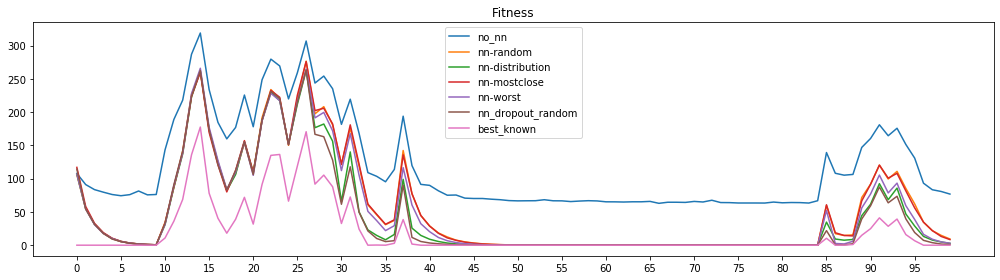

In [3]:
# fitness plots
no_nn = pd.read_csv(path/'no_nn_fitness.csv').mean(0)
nn_random = pd.read_csv(path/'nn-random_fitness.csv').mean(0)
nn_distribution = pd.read_csv(path/'nn-distribution_fitness.csv').mean(0)
nn_mostclose = pd.read_csv(path/'nn-mostclose_fitness.csv').mean(0)
nn_worst = pd.read_csv(path/'nn-worst_fitness.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').fitness
nn_dropout_random = pd.read_csv(path/'nn-dropout-random_fitness.csv').mean(0)
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([no_nn,nn_random, nn_distribution, nn_mostclose,nn_worst , nn_dropout_random, best_known],['no_nn','nn-random', 'nn-distribution', 'nn-mostclose','nn-worst','nn_dropout_random','best_known']): ax.plot(values, label=t)

ax.set_title('Fitness')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'fitness_value.eps', format='eps', dpi=1000)

In [4]:
# constraints plots
nn = pd.read_csv(path/'nn_sumcv.csv').mean(0)
no_nn = pd.read_csv(path/'no_nn_sumcv.csv').mean(0)
nn_random = pd.read_csv(path/'nn-random_sumcv.csv').mean(0)
nn_distribution = pd.read_csv(path/'nn-distribution_sumcv.csv').mean(0)
nn_mostclose = pd.read_csv(path/'nn-mostclose_sumcv.csv').mean(0)
nn_worst = pd.read_csv(path/'nn-worst_sumcv.csv').mean(0)
best_known = pd.read_csv(path/'best_known.csv').sum_constraints
fig,ax = plt.subplots(figsize=(14,4))
for values,t in zip([no_nn,nn_random, nn_distribution, nn_mostclose,nn_worst , best_known],['no_nn','nn-random', 'nn-distribution', 'nn-mostclose','nn-worst','best_known']): ax.plot(values, label=t)

ax.set_title('Sum constraints')
locs,labels = plt.xticks(np.arange(0,99,step=5))
ax.legend()
plt.tight_layout()
plt.savefig(path/'constraints_values.eps', format='eps', dpi=1000)

FileNotFoundError: [Errno 2] File b'../../data/results/experiment1/nn_sumcv.csv' does not exist: b'../../data/results/experiment1/nn_sumcv.csv'